Импортируем необходимые библиотеки.

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set(color_codes=True)

In [23]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project13/Экспорт из БД.csv')

In [24]:
df

,orderid,orderdate,month_order,year_order,customerid,shipperid,sales,costs,profit,quantity,...,category,supplier,supplier_country,employeename,hiredate,office,reports_to,title,year_salary,profit2
0,10248,2012-10-01,10,2012,4,2,343.44,284.37,59.07,12,...,Men´s Clothes,Los Hombres Machos,Spain,Elvis Presley,1993-09-14,1,NaN,President,80000,15.59
1,10248,2012-10-01,10,2012,4,2,140.40,116.25,24.15,10,...,Ladies´Footwear,Asin Fashion Ltd Co,Singapore,Elvis Presley,1993-09-14,1,NaN,President,80000,-19.33
2,10248,2012-10-01,10,2012,4,2,63.55,52.62,10.93,5,...,Bath Clothes,Ravenna Fashion,Italy,Elvis Presley,1993-09-14,1,NaN,President,80000,-32.55
3,10249,2011-10-01,10,2011,79,2,205.20,169.91,35.29,9,...,Children´s wear,SatSUMAs,Japan,Tom Lindwall,1995-11-22,2,4.0,Sales Representative,61000,6.09
4,10249,2011-10-01,10,2011,79,2,4048.00,3642.67,405.33,40,...,Men´s Footwear,Cangaroo Shoes,Australia,Tom Lindwall,1995-11-22,2,4.0,Sales Representative,61000,376.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,11083,2012-02-16,2,2012,14,1,31.50,27.78,3.72,7,...,Babywear,ABC,Sweden,Lennart Skoglund,1994-01-17,4,4.0,Sales Representative,61200,-40.78
2168,11083,2012-02-16,2,2012,14,1,156.50,138.03,18.47,10,...,Ladies´Footwear,Asin Fashion Ltd Co,Singapore,Lennart Skoglund,1994-01-17,4,4.0,Sales Representative,61200,-26.03
2169,11083,2012-02-16,2,2012,14,1,127.50,112.46,15.05,5,...,Men´s Footwear,Niemegen Boots,Netherlands,Lennart Skoglund,1994-01-17,4,4.0,Sales Representative,61200,-29.46
2170,11083,2012-02-16,2,2012,14,1,308.69,264.34,44.36,3,...,Men´s Footwear,Cangaroo Shoes,Australia,Lennart Skoglund,1994-01-17,4,4.0,Sales Representative,61200,-0.15


In [25]:
df.dtypes

orderid               int64
orderdate            object
month_order           int64
year_order            int64
customerid            int64
shipperid             int64
sales               float64
costs               float64
profit              float64
quantity              int64
discount            float64
freight             float64
product              object
category             object
supplier             object
supplier_country     object
employeename         object
hiredate             object
office                int64
reports_to          float64
title                object
year_salary           int64
profit2             float64
dtype: object

In [26]:
df['DateTime'] = pd.to_datetime(df['orderdate'], yearfirst=True)
df = df.drop(['orderdate'], axis=1)

Проверим наличие дублей в данных.

In [27]:
df_duplicate = df[df.duplicated()]
print(f'число дублированных строк в реестре = {df_duplicate.shape}')

число дублированных строк в реестре = (0, 23)


In [28]:
df.count()

orderid             2172
month_order         2172
year_order          2172
customerid          2172
shipperid           2172
sales               2172
costs               2172
profit              2172
quantity            2172
discount            2172
freight             2172
product             2172
category            2172
supplier            2172
supplier_country    2172
employeename        2172
hiredate            2172
office              2172
reports_to          2026
title               2172
year_salary         2172
profit2             2172
DateTime            2172
dtype: int64

Видим, что в столбце reports_to прорущены значения. Внесем нули, вместо пропусков. 

In [29]:
df[df.isna().values.any(axis=1)].head()

,orderid,month_order,year_order,customerid,shipperid,sales,costs,profit,quantity,discount,...,supplier,supplier_country,employeename,hiredate,office,reports_to,title,year_salary,profit2,DateTime
0,10248,10,2012,4,2,343.44,284.37,59.07,12,0.00,...,Los Hombres Machos,Spain,Elvis Presley,1993-09-14,1,NaN,President,80000,15.59,2012-10-01
1,10248,10,2012,4,2,140.40,116.25,24.15,10,0.00,...,Asin Fashion Ltd Co,Singapore,Elvis Presley,1993-09-14,1,NaN,President,80000,-19.33,2012-10-01
2,10248,10,2012,4,2,63.55,52.62,10.93,5,0.00,...,Ravenna Fashion,Italy,Elvis Presley,1993-09-14,1,NaN,President,80000,-32.55,2012-10-01
5,10250,10,2012,34,2,95.90,79.41,16.49,10,0.00,...,Mayflower,USA,Elvis Presley,1993-09-14,1,NaN,President,80000,-62.68,2012-10-05
6,10250,10,2012,34,2,3931.22,2830.48,1100.74,35,512.77,...,Cangaroo Shoes,Australia,Elvis Presley,1993-09-14,1,NaN,President,80000,1021.57,2012-10-05


In [30]:
df = df.fillna({'reports_to': 0})

In [31]:
df

,orderid,month_order,year_order,customerid,shipperid,sales,costs,profit,quantity,discount,...,supplier,supplier_country,employeename,hiredate,office,reports_to,title,year_salary,profit2,DateTime
0,10248,10,2012,4,2,343.44,284.37,59.07,12,0.00,...,Los Hombres Machos,Spain,Elvis Presley,1993-09-14,1,0.0,President,80000,15.59,2012-10-01
1,10248,10,2012,4,2,140.40,116.25,24.15,10,0.00,...,Asin Fashion Ltd Co,Singapore,Elvis Presley,1993-09-14,1,0.0,President,80000,-19.33,2012-10-01
2,10248,10,2012,4,2,63.55,52.62,10.93,5,0.00,...,Ravenna Fashion,Italy,Elvis Presley,1993-09-14,1,0.0,President,80000,-32.55,2012-10-01
3,10249,10,2011,79,2,205.20,169.91,35.29,9,0.00,...,SatSUMAs,Japan,Tom Lindwall,1995-11-22,2,4.0,Sales Representative,61000,6.09,2011-10-01
4,10249,10,2011,79,2,4048.00,3642.67,405.33,40,0.00,...,Cangaroo Shoes,Australia,Tom Lindwall,1995-11-22,2,4.0,Sales Representative,61000,376.13,2011-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,11083,2,2012,14,1,31.50,27.78,3.72,7,0.00,...,ABC,Sweden,Lennart Skoglund,1994-01-17,4,4.0,Sales Representative,61200,-40.78,2012-02-16
2168,11083,2,2012,14,1,156.50,138.03,18.47,10,0.00,...,Asin Fashion Ltd Co,Singapore,Lennart Skoglund,1994-01-17,4,4.0,Sales Representative,61200,-26.03,2012-02-16
2169,11083,2,2012,14,1,127.50,112.46,15.05,5,0.00,...,Niemegen Boots,Netherlands,Lennart Skoglund,1994-01-17,4,4.0,Sales Representative,61200,-29.46,2012-02-16
2170,11083,2,2012,14,1,308.69,264.34,44.36,3,8.99,...,Cangaroo Shoes,Australia,Lennart Skoglund,1994-01-17,4,4.0,Sales Representative,61200,-0.15,2012-02-16


In [32]:
df.describe()

,orderid,month_order,year_order,customerid,shipperid,sales,costs,profit,quantity,discount,freight,office,reports_to,year_salary,profit2
count,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000,2172.000000
mean,10662.680479,6.525783,2011.426335,43.720994,1.988950,820.970497,653.912021,167.058485,23.967311,49.608559,50.420506,2.356814,3.387661,63486.786372,116.637970
std,243.294300,3.275860,0.900180,25.357716,0.595444,2002.528371,1577.331315,455.554336,19.189360,226.864986,17.351569,1.484833,1.178181,5038.807060,455.913161
min,10248.000000,1.000000,2009.000000,1.000000,1.000000,2.120000,1.830000,0.270000,1.000000,0.000000,12.450000,1.000000,0.000000,60000.000000,-76.820000
25%,10452.000000,3.000000,2011.000000,23.000000,2.000000,154.260000,123.350000,25.185000,10.000000,0.000000,34.900000,1.000000,4.000000,61000.000000,-21.887500
50%,10659.500000,7.000000,2012.000000,39.000000,2.000000,355.070000,282.275000,63.580000,20.000000,0.000000,50.460000,2.000000,4.000000,61200.000000,13.755000
75%,10868.250000,9.000000,2012.000000,63.000000,2.000000,796.400000,648.237500,148.115000,30.000000,26.835000,65.670000,3.000000,4.000000,63000.000000,102.182500
max,11083.000000,12.000000,2013.000000,127.000000,3.000000,43755.120000,32160.010000,11595.110000,150.000000,7292.520000,79.960000,5.000000,4.000000,80000.000000,11531.790000


Проверим на наличие выбросов в данных.

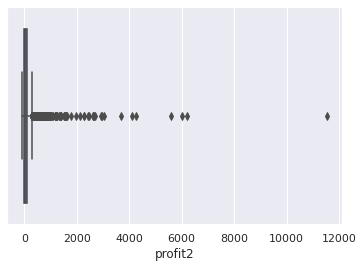

In [33]:
sns.boxplot(x=df['profit2'])

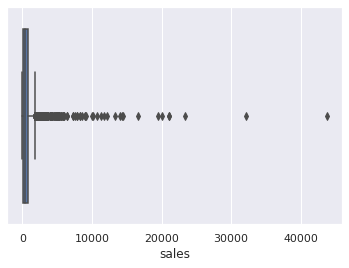

In [34]:
sns.boxplot(x=df['sales'])

Text(0.5, 0, 'category')

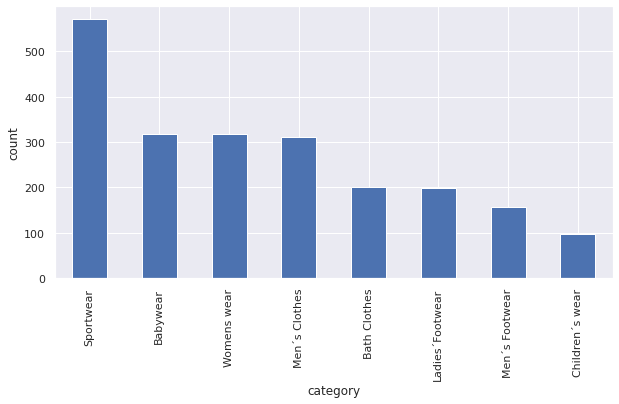

In [35]:
df.category.value_counts().plot(kind='bar', figsize=(10,5))
plt.ylabel('count')
plt.xlabel('category')

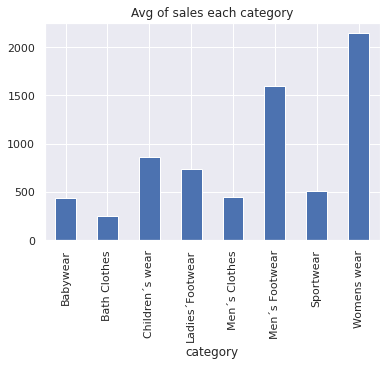

In [36]:
df.groupby('category').mean().sales.plot(kind='bar', title='Avg of sales each category')

Видно, что больше всего прибыли приносит категория Womens wear и Men's Footwear. Sportwear по количеству продаж лидер, но прибыль низкая относительно других категорий.

Text(0.5, 0, 'supplier_country')

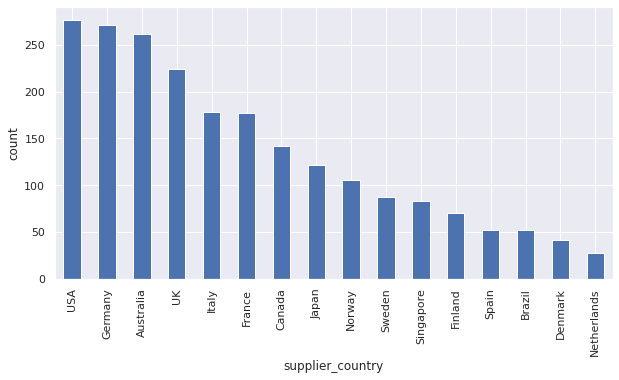

In [37]:
df.supplier_country.value_counts().plot(kind='bar', figsize=(10,5))
plt.ylabel('count')
plt.xlabel('supplier_country')

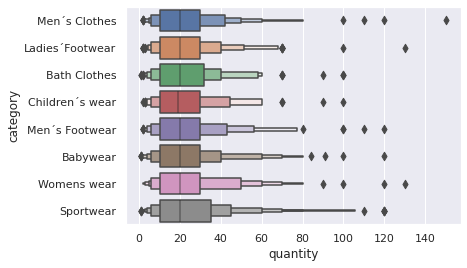

In [38]:
sns.boxenplot(y = 'category', x = 'quantity', data=df)

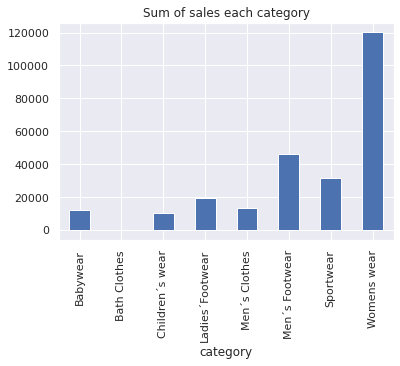

In [39]:
df.groupby('category').sum().profit2.plot(kind='bar', title='Sum of sales each category')

In [40]:
px.scatter(df, x='sales',y='profit2',size='quantity', size_max=60, color='category')

Категория Bath Clothes оказалась убыточная за все периоды.

Удалим лишние столбцы.

In [41]:
df = df.drop(['orderid', 'month_order', 'year_order', 'customerid', 'shipperid', 'office', 'reports_to', 'year_salary', 'product', 'category', 'supplier', 'supplier_country',
              'employeename', 'hiredate', 'title', 'DateTime'], axis=1)

In [42]:
df

,sales,costs,profit,quantity,discount,freight,profit2
0,343.44,284.37,59.07,12,0.00,43.48,15.59
1,140.40,116.25,24.15,10,0.00,43.48,-19.33
2,63.55,52.62,10.93,5,0.00,43.48,-32.55
3,205.20,169.91,35.29,9,0.00,29.20,6.09
4,4048.00,3642.67,405.33,40,0.00,29.20,376.13
...,...,...,...,...,...,...,...
2167,31.50,27.78,3.72,7,0.00,44.50,-40.78
2168,156.50,138.03,18.47,10,0.00,44.50,-26.03
2169,127.50,112.46,15.05,5,0.00,44.50,-29.46
2170,308.69,264.34,44.36,3,8.99,44.50,-0.15


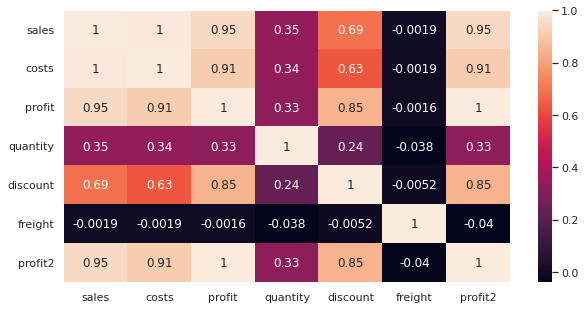

In [43]:
plt.figure(figsize=(10, 5))
c = df.corr()
sns.heatmap(c, annot=True)

Удалим выбросы.

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

sales       642.1400
costs       524.8875
profit      122.9300
quantity     20.0000
discount     26.8350
freight      30.7700
profit2     124.0700
dtype: float64

In [45]:
df = df[~((df < (Q1 - 1.5 * IQR))| (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1695, 7)

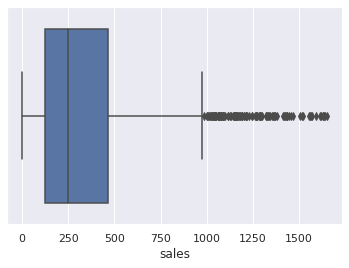

In [46]:
sns.boxplot(x=df['sales'])

In [47]:
df = df.drop(['costs'], axis=1)
df

,sales,profit,quantity,discount,freight,profit2
0,343.44,59.07,12,0.00,43.48,15.59
1,140.40,24.15,10,0.00,43.48,-19.33
2,63.55,10.93,5,0.00,43.48,-32.55
3,205.20,35.29,9,0.00,29.20,6.09
5,95.90,16.49,10,0.00,79.17,-62.68
...,...,...,...,...,...,...
2167,31.50,3.72,7,0.00,44.50,-40.78
2168,156.50,18.47,10,0.00,44.50,-26.03
2169,127.50,15.05,5,0.00,44.50,-29.46
2170,308.69,44.36,3,8.99,44.50,-0.15


In [48]:
X = df.drop(['sales', 'profit2'], axis=1)
y = df.sales

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [51]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
r_sq = lm.score(X_train, y_train)
print(r_sq)

0.9183414500592076
